<a href="https://colab.research.google.com/github/Zernach/DS-Unit-1-Sprint-1-Data-Wrangling-and-Storytelling/blob/master/Zernach_Ryan_LS_DS_114_Make_Explanatory_Visualizations_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ASSIGNMENT COMPLETED BY: [RYAN ZERNACH](https://ZERNACH.COM/RYAN-ZERNACH)

![alt text](http://www.zernach.com/wp-content/uploads/2019/09/Ryan-Zernach-Logo-1-e1568499634499.png)

Lambda School Data Science

*Unit 1, Sprint 1, Module 4*

---

# ASSIGNMENT

### 1) Replicate the lesson code. I recommend that you [do not copy-paste](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit).

Get caught up to where we got our example in class and then try and take things further. How close to "pixel perfect" can you make the lecture graph?

Once you have something that you're proud of, share your graph in the cohort channel and move on to the second exercise.


###I found it to be more useful for me to go through the code in the example from lecture, one line at a time, and instead of copying it, making some personalized modifications to each small line of code, and viewing the minor changes that had an affect on the plot results when the code cell was run. Therefore, it's not replicated, but it very easily could have been.

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Pull the entire dataset as a CSV file

csv_data = pd.read_csv('https://raw.githubusercontent.com/fivethirtyeight/data/master/inconvenient-sequel/ratings.csv')

# Because we were just replicating the code from the lesson, I individually
# studied the output of each of the following lines of code while viewing the
# lecture notebook, and then manually typed the important lines below, but only
# after mentally comprehending the purpose of each line:

csv_data['timestamp'] = pd.to_datetime(csv_data['timestamp'])

csv_data.set_index('timestamp', inplace = True)

last_day = csv_data['2017-08-29']

last_day_filtered = last_day[last_day['category'] == 'IMDb users']

final_row = last_day_filtered.tail(1)

final_row

,respondents,category,link,average,mean,median,1_votes,2_votes,3_votes,4_votes,5_votes,6_votes,7_votes,8_votes,9_votes,10_votes,1_pct,2_pct,3_pct,4_pct,5_pct,6_pct,7_pct,8_pct,9_pct,10_pct
timestamp,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-08-29 23:10:06.218251,2662,IMDb users,http://www.imdb.com/title/tt6322922/ratings,5.4,5.6,7,1021,69,38,25,55,110,154,147,146,897,38.4,2.6,1.4,0.9,2.1,4.1,5.8,5.5,5.5,33.7


In [81]:
final_row.T

timestamp,2017-08-29 23:10:06.218251
respondents,2662
category,IMDb users
link,http://www.imdb.com/title/tt6322922/ratings
average,5.4
mean,5.6
median,7
1_votes,1021
2_votes,69
3_votes,38
4_votes,25


In [82]:
percent_columns = ['1_pct', '2_pct', '3_pct', '4_pct', '5_pct',
               '6_pct', '7_pct', '8_pct', '9_pct', '10_pct']

final_row[percent_columns].T

timestamp,2017-08-29 23:10:06.218251
1_pct,38.4
2_pct,2.6
3_pct,1.4
4_pct,0.9
5_pct,2.1
6_pct,4.1
7_pct,5.8
8_pct,5.5
9_pct,5.5
10_pct,33.7


In [83]:
plotting_data = final_row[percent_columns].T
plotting_data

timestamp,2017-08-29 23:10:06.218251
1_pct,38.4
2_pct,2.6
3_pct,1.4
4_pct,0.9
5_pct,2.1
6_pct,4.1
7_pct,5.8
8_pct,5.5
9_pct,5.5
10_pct,33.7


In [84]:
plotting_data.index = range(1, 11)

plotting_data.columns = ['percentage']

plotting_data

,percentage
1,38.4
2,2.6
3,1.4
4,0.9
5,2.1
6,4.1
7,5.8
8,5.5
9,5.5
10,33.7


''

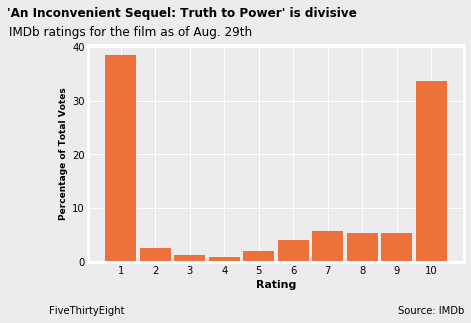

In [116]:
# My tick marks stopped showing up. I think it's because the FiveThirtyEight
# style has a transparent background, and the tickmarks are white?
# I don't really know. But I changed the figure facecolor and the axes background
# color to a light grey, just to show my tickmarks, even though it's not an 
# identical replication of the chart from the image.

fig, ax = plt.subplots()

fig.patch.set(facecolor='#ececec')

ax.bar(x = plotting_data.index, height = plotting_data['percentage'], width = 0.9, color = '#ED713A')

ax.set(facecolor='#ececec')

# TITLE & SUBTITLE
ax.set_title("'An Inconvenient Sequel: Truth to Power' is divisive",
             fontsize=12, x=.25, y=1.1, fontweight='bold', color='#000000')

ax.text(s='IMDb ratings for the film as of Aug. 29th',
        fontsize=12, x=-2.25, y=42, color='#000000')

# x and y axes labeling
ax.set_xlabel('Rating', fontsize=11, color='#000000', fontweight='bold')
ax.set_ylabel('Percentage of Total Votes', fontsize=9, color='#000000', fontweight='bold')

# tick marks and grid
ax.set_xticklabels(plotting_data.index, rotation=0, color='#000000')
ax.set_xticks(plotting_data.index)
ax.set_yticklabels(range(0, 50, 10), color='#000000')
ax.set_yticks(range(0, 50, 10))

trans = ax.get_xaxis_transform()
ax.annotate('FiveThirtyEight', xy=(0, -.2), xycoords=trans, ha="center", va="top", color='#000000')
ax.annotate('Source: IMDb', xy=(10, -.2), xycoords=trans, ha="center", va="top", color='#000000')
;


### 2) Reproduce another example from [FiveThityEight's shared data repository](https://data.fivethirtyeight.com/).

**WARNING**: There are a lot of very custom graphs and tables at the above link. I **highly** recommend not trying to reproduce any that look like a table of values or something really different from the graph types that we are already familiar with. Search through the posts until you find a graph type that you are more or less familiar with: histogram, bar chart, stacked bar chart, line chart, [seaborn relplot](https://seaborn.pydata.org/generated/seaborn.relplot.html), etc. Recreating some of the graphics that 538 uses would be a lot easier in Adobe photoshop/illustrator than with matplotlib. 

- If you put in some time to find a graph that looks "easy" to replicate you'll probably find that it's not as easy as you thought. 

- If you start with a graph that looks hard to replicate you'll probably run up against a brick wall and be disappointed with your afternoon.

# **TRYING TO REPLICATE THE IMAGE SHOWN BELOW**

In [3]:
from IPython.display import display, Image

url = 'https://fivethirtyeight.com/wp-content/uploads/2014/07/chalabi-datalab-sleep-one1.png?w=575'
example = Image(url=url, width=800)

display(example)

In [4]:
import pandas as pd
df = pd.read_csv('http://www.zernach.com/wp-content/uploads/2019/10/sleeping-apart-data.csv')
print(df.shape)
df.head()

(1094, 31)


,StartDate,EndDate,Which of the following best describes your current relationship status?,"How long have you been in your current relationship? If you are not currently in a relationship, please answer according to your last relationship.","When both you and your partner are at home, how often do you sleep in separate beds?","When you're not sleeping in the same bed as your partner, where do you typically sleep?",Unnamed: 6,"When you're not sleeping in the same bed, where does your partner typically sleep?",Unnamed: 8,What are the reasons that you sleep in separate beds? Please select all that apply.,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,When was the first time you slept in separate beds?,"To what extent do you agree with the following statement: ""sleeping in separate beds helps us to stay together.""","To what extent do you agree with the following statement: ""we sleep better when we sleep in separate beds.""","To what extent do you agree with the following statement:ë_""our sex life has improved as a result of sleeping in separate beds.""ë_",Which of the following best describes your current occupation?,Unnamed: 25,Gender,Age,Household Income,Education,Location (Census Region)
0,NaN,NaN,Response,Response,Response,Response,Other (please specify),Response,Other (please specify),One of us snores,One of us makes frequent bathroom trips in the...,One of us is sick,We are no longer physically intimate,We have different temperature preferences for ...,We've had an argument or fight,Not enough space,Do not want to share the covers,One of us needs to sleep with a child,Night working/very different sleeping times,Other (please specify),Response,Response,Response,Response,Response,Other (please specify),Response,Response,Response,Response,Response
1,7/10/2014 18:37,7/10/2014 18:39,"Single, but cohabiting with a significant other",1-5 years,Once a year or less,On the couch/chair,NaN,"My partner sleeps in our shared bed, I'm the o...",NaN,NaN,NaN,One of us is sick,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Other (please specify),Within the first 1-5 years of our relationship,Strongly disagree,Somewhat agree,Strongly disagree,Other (please specify),Student,Male,18-29,"$0 - $24,999",Some college or Associate degree,Pacific
2,7/10/2014 15:54,7/10/2014 15:56,"Single, but cohabiting with a significant other",1-5 years,A few times per month,"I sleep in our shared bed, my partner is the o...",NaN,Separate bedroom,NaN,One of us snores,One of us makes frequent bathroom trips in the...,One of us is sick,NaN,NaN,We've had an argument or fight,NaN,Do not want to share the covers,NaN,NaN,NaN,Immediately/ We've always slept in separate beds,Somewhat agree,Strongly agree,Strongly disagree,Healthcare Support Occupations,NaN,Male,18-29,NaN,Bachelor degree,South Atlantic
3,7/10/2014 15:44,7/10/2014 15:49,Married,1-5 years,Never,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Legal Occupations,NaN,Male,18-29,"$150,000+",Graduate degree,South Atlantic
4,7/10/2014 13:47,7/10/2014 13:47,Married,1-5 years,Never,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Life, Physical, and Social Science Occupations",NaN,Male,18-29,"$25,000 - $49,999",Bachelor degree,Middle Atlantic


In [5]:
df['When both you and your partner are at home, how often do you sleep in separate beds?'].value_counts()

Never                    586
Every night              147
Once a year or less      137
Once a month or less     101
A few times per month     62
A few times per week      46
Response                   1
Name: When both you and your partner are at home, how often do you sleep in separate beds?, dtype: int64

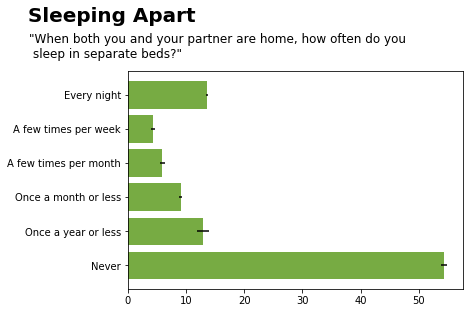

In [43]:
fig2, ax2 = plt.subplots()

fig2.patch.set(facecolor='#ffffff')

responses = ('Every night', 'A few times per week', 'A few times per month',
          'Once a month or less', 'Once a year or less', 'Never')
y_pos = np.arange(len(responses))
percentages = (13.6, 4.3, 5.9, 9.1, 12.9, 54.3)
error = np.random.rand(len(responses))

ax2.barh(y_pos, percentages, xerr=error, align='center', color='#77AB43')
ax2.set_yticks(y_pos)
ax2.set_yticklabels(responses)
ax2.invert_yaxis()  # labels read top-to-bottom
ax2.set_title('Sleeping Apart', loc='left', fontsize=20, x=-.3, y=1.2, fontweight='bold')

ax2.text(s='"When both you and your partner are home, how often do you \n sleep in separate beds?"', fontsize=12, x=-17, y=-1.1);

plt.show()

# STRETCH OPTIONS

### 1) Reproduce one of the following using the matplotlib or seaborn libraries:

- [thanksgiving-2015](https://fivethirtyeight.com/features/heres-what-your-part-of-america-eats-on-thanksgiving/) 
- [candy-power-ranking](https://fivethirtyeight.com/features/the-ultimate-halloween-candy-power-ranking/) 
- or another example of your choice!

### 2) Make more charts!

Choose a chart you want to make, from [Visual Vocabulary - Vega Edition](http://ft.com/vocabulary).

Find the chart in an example gallery of a Python data visualization library:
- [Seaborn](http://seaborn.pydata.org/examples/index.html)
- [Altair](https://altair-viz.github.io/gallery/index.html)
- [Matplotlib](https://matplotlib.org/gallery.html)
- [Pandas](https://pandas.pydata.org/pandas-docs/stable/visualization.html)

Reproduce the chart. [Optionally, try the "Ben Franklin Method."](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit) If you want, experiment and make changes.

Take notes. Consider sharing your work with your cohort!

In [0]:
# More Work Here
